In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shapereader
from cartopy.feature import ShapelyFeature

C:\Users\saman\AppData\Local\Temp\ipykernel_15124\2281923274.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Moderate
Evald Tang Kristensen (1843–1929) is one of the most important collectors of
Danish folktales (Tangherlini 2013). In his long career, he has traveled nearly
70,000 kilometers to record stories from more than 4,500 storytellers in more
than 1,800 different indentifiable places (Storm et al. 2017). His logs provide
a unique insight into how his story collection came about, and unravels inter-
esting aspects of the methods applied by folklore researchers. In the following
exercises, we try to unravel some his collecting methods. We use a map of Den-
mark for this, which we can display with the denmark_basemap() function (see
figure 7.6):

In [2]:
def basemap(shapefile,
            projection,
            extent=None,
            nrows=1,
            ncols=1,
            figsize=(8, 8)):
    f, axes = plt.subplots(
        nrows,
        ncols,
        figsize=figsize,
        dpi=100,
        subplot_kw=dict(projection=projection, frameon=False))
    axes = [axes] if (nrows + ncols) == 2 else axes.flatten()
    for ax in axes:
        ax.set_extent(extent, ccrs.PlateCarree())
        shape_feature = ShapelyFeature(
            shapereader.Reader(shapefile).geometries(),
            ccrs.PlateCarree(),
            facecolor='lightgray',
            edgecolor='white')
        ax.add_feature(shape_feature, linewidth=0.3)
        # ax.outline_patch.set_visible(False)
    return f, (axes[0] if (nrows + ncols) == 2 else axes)

def denmark_basemap(nrows=1, ncols=1, figsize=(8, 8)):
    projection = ccrs.LambertConformal(
        central_latitude=50, central_longitude=10)
    extent = 8.09, 14.15, 54.56, 57.75
    return basemap(
        './ltcs180_textbook/07-map-making/data/denmark/denmark.shp',
        projection,
        extent=extent,
        nrows=nrows,
        ncols=ncols,
        figsize=figsize)

1. The historical GIS data of Tang Kristensen’s diary pages are stored in the
CSV file data/kristensen.csv (we gratefully use the data that has been
made available and described by (Storm et al. 2017; see also Tangherlini
and Broadwell 2014). Each row in the data corresponds to a stop in Kris-
tensen’s travels. Load the data with Pandas and plot each stop on the map.
The geographical coordinates of each stop are stored in the lat (latitude)
and lon (longitude) columns of the table. (Tip: reduce the opacity of each
stop to get a better overview of frequently visited places.)

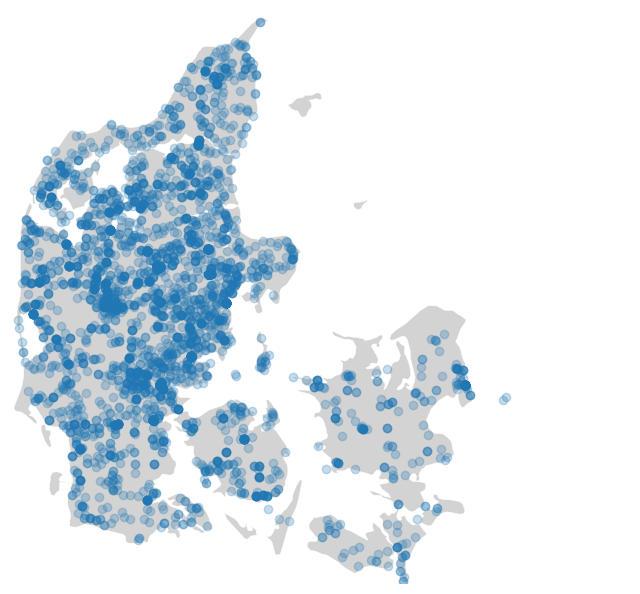

In [3]:
gis_df = pd.read_csv("./ltcs180_textbook/07-map-making/data/kristensen.csv")
fig, m = denmark_basemap()
m.scatter(
    gis_df['lon'],
    gis_df['lat'],
    zorder=2,
    alpha=0.25,
    transform=ccrs.PlateCarree()
)

2. Kristensen made several field trips to collect stories, which are described
in the four volumes Minder and Oplevelser (Memories and Experiences).
At each of these field trips, Kristensen made several stops at different
places. His field trips are numbered in the FT column. Create a new map
and plot the locations of the stops that Kristensen made on field trip 10,
50, and 100. Give each of these field trips a different color, and add a
corresponding legend to the map.


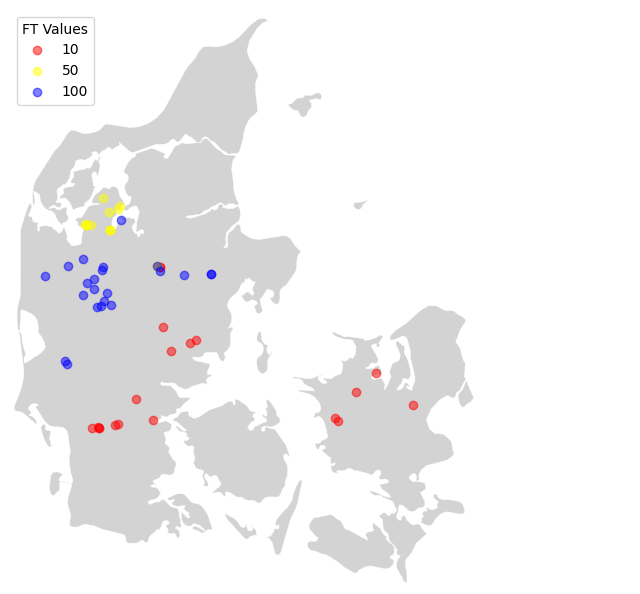

In [4]:
gis_df_10 = gis_df[gis_df["FT"] == 10.0]
gis_df_50 = gis_df[gis_df["FT"] == 50.0]
gis_df_100 = gis_df[gis_df["FT"] == 100.0]
fig, m = denmark_basemap()

m.scatter(
    gis_df_10['lon'],
    gis_df_10['lat'],
    zorder=2,
    alpha=0.5,
    color='red',
    label='10',
    transform=ccrs.PlateCarree()
)

m.scatter(
    gis_df_50['lon'],
    gis_df_50['lat'],
    zorder=2,
    alpha=0.5,
    color='yellow',
    label='50',
    transform=ccrs.PlateCarree()
)

m.scatter(
    gis_df_100['lon'],
    gis_df_100['lat'],
    zorder=2,
    alpha=0.5,
    color='blue',
    label='100',
    transform=ccrs.PlateCarree()
)

legend = plt.legend(loc='upper left')
legend.set_title("FT Values")
plt.show()


3. The number of places that Kristensen visited during his field trips varies
greatly. Make a plot with the trips in chronological order on the X axis
and the number of places he visited during a particular year on the Y axis. The data has a Year column that you can use for this. What does the plot tell you about Kristensen’s career?

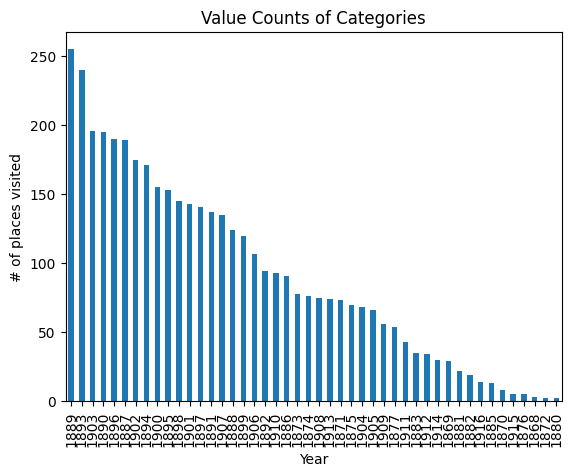

In [5]:
year_counts = gis_df["Year"].value_counts()
year_counts.plot(kind='bar')
plt.title('Value Counts of Categories')
plt.xlabel('Year')
plt.ylabel('# of places visited')
plt.show()

This graph shows that Kristensen took a lot of trips at the beginning of his career, but took fewer and fewer as he got older.